In [73]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib widget

from jcm_lib import fases,simu_unit_y_disip,plot_delta_simu

#DEFINIMOS LOS OPERADORES QUE VAMOS A USAR EN LOS CALCULOS
n=tensor(qeye(2),qeye(2),num(3))
sqrtN=tensor(qeye(2),qeye(2),Qobj(np.diag([0,1,np.sqrt(2)])))
n2=tensor(qeye(2),qeye(2),Qobj(np.diag([0,1,4])))
a=tensor(qeye(2),qeye(2),destroy(3))
sm1=tensor(sigmam(),qeye(2),qeye(3))
sp1=tensor(sigmap(),qeye(2),qeye(3))
sz1=tensor(sigmaz(),qeye(2),qeye(3))
sx1=tensor(sigmax(),qeye(2),qeye(3))
sm2=tensor(qeye(2),sigmam(),qeye(3))
sp2=tensor(qeye(2),sigmap(),qeye(3))
sz2=tensor(qeye(2),sigmaz(),qeye(3))
sx2=tensor(qeye(2),sigmax(),qeye(3))

#DEFINIMOS LOS VECTORES DE LA BASE
e=basis(2,0)
gr=basis(2,1)

ee0=tensor(e,e,basis(3,0)) #0
ee1=tensor(e,e,basis(3,1)) #1
ee2=tensor(e,e,basis(3,2)) #2

eg0=tensor(e,gr,basis(3,0)) #3
ge0=tensor(gr,e,basis(3,0)) #6

eg1=tensor(e,gr,basis(3,1)) #4
ge1=tensor(gr,e,basis(3,1)) #7

eg2=tensor(e,gr,basis(3,2)) #5
ge2=tensor(gr,e,basis(3,2)) #8

gg0=tensor(gr,gr,basis(3,0)) #9
gg1=tensor(gr,gr,basis(3,1)) #10
gg2=tensor(gr,gr,basis(3,2)) #11

# from mpl_toolkits.mplot3d import axes3d


SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure.subplot',left=0.14)
plt.rc('figure.subplot',bottom=0.11)
plt.rc('figure.subplot',right=0.962)
plt.rc('figure.subplot',top=0.95)
plt.rc('figure.subplot',wspace=0.07)

In [74]:
acoplamiento='lineal'
if acoplamiento=='lineal':
    acop=1/2
elif acoplamiento=='bs':
    acop=1
else:
    print(f"Acoplamietno tiene que ser lineal o bs pero es {acoplamiento}")
    exit()

def beta_n(n_:int,k:float,J:float,x:float):
    return -(x*(n_**2+(n_-1)**2+(n_-2)**2)+J+2*k)

def gamma_n(n_:int,d:float,g:float,k:float,J:float,x:float,a:float=acop):
    return (x*(n_-1)**2-J+2*k)*(x*(n_-2)**2+x*n_**2+2*J)+(x*(n_-2)**2+d+J)*(x*n_**2-d+J)-2*g**2*(n_**(2*a)+(n_-1)**(2*a))

def eta_n(n_:int,d:float,g:float,k:float,J:float,x:float,a:float=acop):
    return -(x*n_**2 - d + J)*(x*(n_ - 2)**2 + d + J)*(x*(n_ - 1)**2 - J + 2*k)+ 2*g**2*(x*(n_ - 2)**2*n_**(2*a) + x*n_**2*(n_ - 1)**(2*a) + d* (n_**(2*a) - (n_ - 1)**(2*a)) + J*(n_**(2*a) - (n_ - 1)**(2*a)))

def Q_n(n_:int,d:float,g:float,k:float,J:float,x:float):
    return gamma_n(n_,d,g,k,J,x)/3-beta_n(n_,k,J,x)*beta_n(n_,k,J,x)/9

def R_n(n_:int,d:float,g:float,k:float,J:float,x:float):
    return 1/54*(9*beta_n(n_,k,J,x)*gamma_n(n_,d,g,k,J,x)-27*eta_n(n_,d,g,k,J,x)-2*beta_n(n_,k,J,x)*beta_n(n_,k,J,x)*beta_n(n_,k,J,x))

def theta_n(n_:int,d:float,g:float,k:float,J:float,x:float):
    return np.arccos(R_n(n_,d,g,k,J,x)/np.sqrt(-Q_n(n_,d,g,k,J,x)**3))

def omega_general(n_:int,j:int,d:float,g:float,k:float,J:float,x:float):
    return 2*np.sqrt(-Q_n(n_,d,g,k,J,x))*np.cos((theta_n(n_,d,g,k,J,x)+2*(j-1)*np.pi)/3)

def rabi_freq(n_:int,j1:int,j2:int,d:float,g:float,k:float,J:float,x:float):
    return omega_general(n_,j2,d,g,k,J,x)-omega_general(n_,j1,d,g,k,J,x)

delta=0
k=0
J=0
k=0
g=0.001
x=0

print(f'rabi 2 1 2 {2*np.pi/np.abs(rabi_freq(2,1,2,delta,g,k,J,x))}')
print(f'rabi 2 2 3 {2*np.pi/np.abs(rabi_freq(2,1,2,delta,g,k,J,x))}')
print(f'rabi 2 3 1 {2*np.pi/np.abs(rabi_freq(2,1,2,delta,g,k,J,x))}')

print(f'omega manual {2*np.pi/(np.sqrt(2*g**2+(k-J+delta/2-x/2)**2))}')
print(f'omega general 1 2 {2*np.pi/omega_general(1,2,delta,g,k,J,x)}')


def f():
    if acoplamiento=='lineal':
        return 1
    elif acoplamiento=='bs':
        return sqrtN

def pr(estado):
    return estado.unit()*estado.unit().dag()

rabi 2 1 2 1282.5498301618638
rabi 2 2 3 1282.5498301618638
rabi 2 3 1 1282.5498301618638
omega manual 4442.882938158366
omega general 1 2 -4442.882938158366


<>:52: SyntaxWarning: invalid escape sequence '\d'
<>:53: SyntaxWarning: invalid escape sequence '\D'
<>:52: SyntaxWarning: invalid escape sequence '\d'
<>:53: SyntaxWarning: invalid escape sequence '\D'
C:\Users\juego\AppData\Local\Temp\ipykernel_6556\720860349.py:52: SyntaxWarning: invalid escape sequence '\d'
  ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)
C:\Users\juego\AppData\Local\Temp\ipykernel_6556\720860349.py:53: SyntaxWarning: invalid escape sequence '\D'
  ax_fg.set_xlabel('$\Delta/g$',size=20)


(-25.0, 25.0)

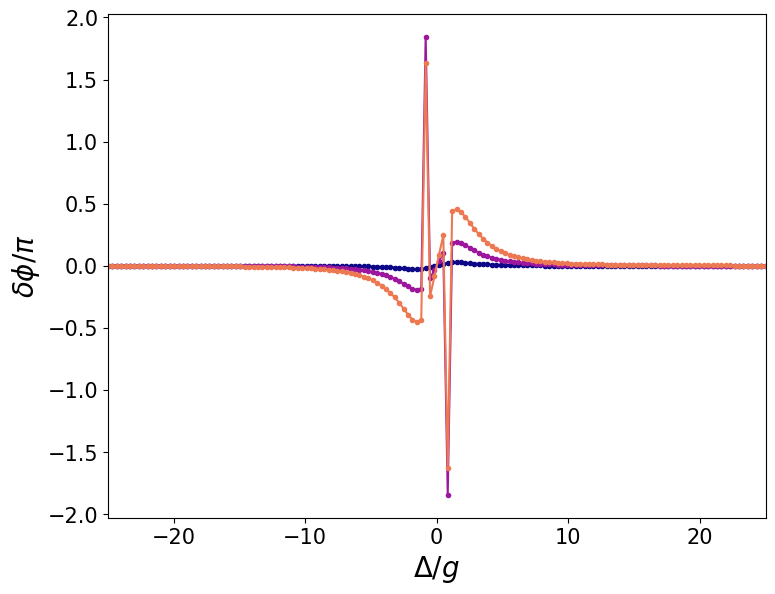

In [ ]:
w_0=1
g=0.001*w_0
p=0.005*g

x=0

k=0
J=0



fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
delta_list=np.linspace(-25*g,25*g,150)

for j,gamma in enumerate([0.01*g,0.1*g,0.25*g]):

    colors=mpl.colormaps['plasma'](np.linspace(0,1,3+1))
    deltafg=np.zeros(len(delta_list))
    for i,delta in enumerate(delta_list):

        
        '''---Hamiltoniano---'''

        H=x*n2 + delta/2*(sz1+sz2) + g*((sm1+sm2)*f()*a.dag()+(sp1+sp2)*a*f()) + 2*k*(sm1*sp2+sp1*sm2) + J*sz1*sz2
            
        '''---Simulacion numerica---'''
        T=2*np.pi/np.abs(rabi_freq(2,1,2,delta,g,k,J,x))
        # T=2*np.pi/np.abs(omega_general(1,1,delta,g,k,J,x))
        t_final=3*T
        steps=10000

        psi0=(eg1+ge1).unit()
        l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*(sp1+sp2)]
        t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
        sol_u=mesolve(H,psi0,t,c_ops=[])
        sol_d=mesolve(H,psi0,t,c_ops=l_ops)
        fg_u,arg,eigenvals_t_u = fases(sol_u)
        fg_d,arg,eigenvals_t_d = fases(sol_d)

        deltafg[i]=fg_d[-1]-fg_u[-1]

    ax_fg.plot(delta_list/g,deltafg/np.pi,color=colors[j],marker='.')

ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)
ax_fg.set_xlabel('$\Delta/g$',size=20)
ax_fg.set_xlim(delta_list[0]/g,delta_list[-1]/g)

<>:53: SyntaxWarning: invalid escape sequence '\d'
<>:54: SyntaxWarning: invalid escape sequence '\D'
<>:53: SyntaxWarning: invalid escape sequence '\d'
<>:54: SyntaxWarning: invalid escape sequence '\D'
C:\Users\juego\AppData\Local\Temp\ipykernel_5040\623528068.py:53: SyntaxWarning: invalid escape sequence '\d'
  ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)
C:\Users\juego\AppData\Local\Temp\ipykernel_5040\623528068.py:54: SyntaxWarning: invalid escape sequence '\D'
  ax_fg.set_xlabel('$\Delta/g$',size=20)


-------GAMMA 0.01g------------
---Delta -10.0g
---Delta -8.0g
---Delta -6.0g
---Delta -4.0g
---Delta -2.0g
---Delta 0.0g
---Delta 2.0g
---Delta 4.0g
---Delta 6.0g
---Delta 8.000000000000002g
---Delta 10.0g
-------GAMMA 0.1g------------
---Delta -10.0g
---Delta -8.0g
---Delta -6.0g
---Delta -4.0g
---Delta -2.0g
---Delta 0.0g
---Delta 2.0g
---Delta 4.0g
---Delta 6.0g
---Delta 8.000000000000002g
---Delta 10.0g
-------GAMMA 0.25g------------
---Delta -10.0g
---Delta -8.0g
---Delta -6.0g
---Delta -4.0g
---Delta -2.0g
---Delta 0.0g
---Delta 2.0g
---Delta 4.0g
---Delta 6.0g
---Delta 8.000000000000002g
---Delta 10.0g


(-10.0, 10.0)

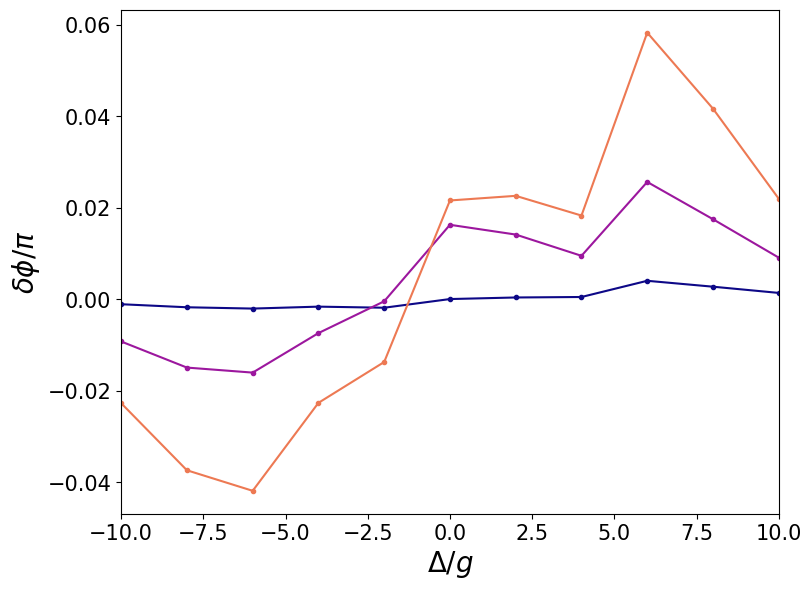

In [15]:
w_0=1
g=0.001*w_0
p=0.005*g

x=0

k=2.5*g
J=0*g

def f():
    if acoplamiento=='lineal':
        return 1
    elif acoplamiento=='bs':
        return sqrtN

def pr(estado):
    return estado.unit()*estado.unit().dag()


fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
delta_list=np.linspace(-10*g,10*g,11)

for j,gamma in enumerate([0.01*g,0.1*g,0.25*g]):
    print(f'-------GAMMA {gamma/g}g------------')
    colors=mpl.colormaps['plasma'](np.linspace(0,1,3+1))
    deltafg=np.zeros(len(delta_list))
    for i,delta in enumerate(delta_list):
        print(f'---Delta {delta/g}g')
        
        
        '''---Hamiltoniano---'''

        H=x*n2 + delta/2*(sz1+sz2) + g*((sm1+sm2)*f()*a.dag()+(sp1+sp2)*a*f()) + 2*k*(sm1*sp2+sp1*sm2) + J*sz1*sz2
            
        '''---Simulacion numerica---'''
        T=2*np.pi/np.abs(rabi_freq(2,1,2,delta,g,k,J,x))
        t_final=3*T
        steps=6000

        psi0=(eg1+ge1).unit()
        l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*(sp1+sp2)]
        t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
        sol_u=mesolve(H,psi0,t,c_ops=[])
        sol_d=mesolve(H,psi0,t,c_ops=l_ops)
        fg_u,arg,eigenvals_t_u = fases(sol_u)
        fg_d,arg,eigenvals_t_d = fases(sol_d)

        deltafg[i]=fg_d[-1]-fg_u[-1]

    ax_fg.plot(delta_list/g,deltafg/np.pi,color=colors[j],marker='.')

ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)
ax_fg.set_xlabel('$\Delta/g$',size=20)
ax_fg.set_xlim(delta_list[0]/g,delta_list[-1]/g)

<>:53: SyntaxWarning: invalid escape sequence '\d'
<>:54: SyntaxWarning: invalid escape sequence '\D'
<>:53: SyntaxWarning: invalid escape sequence '\d'
<>:54: SyntaxWarning: invalid escape sequence '\D'
C:\Users\juego\AppData\Local\Temp\ipykernel_5040\1086405428.py:53: SyntaxWarning: invalid escape sequence '\d'
  ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)
C:\Users\juego\AppData\Local\Temp\ipykernel_5040\1086405428.py:54: SyntaxWarning: invalid escape sequence '\D'
  ax_fg.set_xlabel('$\Delta/g$',size=20)


-------GAMMA 0.01g------------
---Delta -20.0g
---Delta -18.18181818181818g
---Delta -16.363636363636363g
---Delta -14.545454545454545g
---Delta -12.727272727272727g
---Delta -10.90909090909091g
---Delta -9.09090909090909g
---Delta -7.2727272727272725g
---Delta -5.454545454545455g
---Delta -3.6363636363636354g
---Delta -1.8181818181818195g
---Delta 0.0g
---Delta 1.8181818181818195g
---Delta 3.6363636363636354g
---Delta 5.454545454545455g
---Delta 7.272727272727271g
---Delta 9.09090909090909g
---Delta 10.90909090909091g
---Delta 12.727272727272728g
---Delta 14.545454545454545g
---Delta 16.36363636363636g
---Delta 18.181818181818183g
---Delta 20.0g
-------GAMMA 0.1g------------
---Delta -20.0g
---Delta -18.18181818181818g
---Delta -16.363636363636363g
---Delta -14.545454545454545g
---Delta -12.727272727272727g
---Delta -10.90909090909091g
---Delta -9.09090909090909g
---Delta -7.2727272727272725g
---Delta -5.454545454545455g
---Delta -3.6363636363636354g
---Delta -1.8181818181818195g
---D

(-20.0, 20.0)

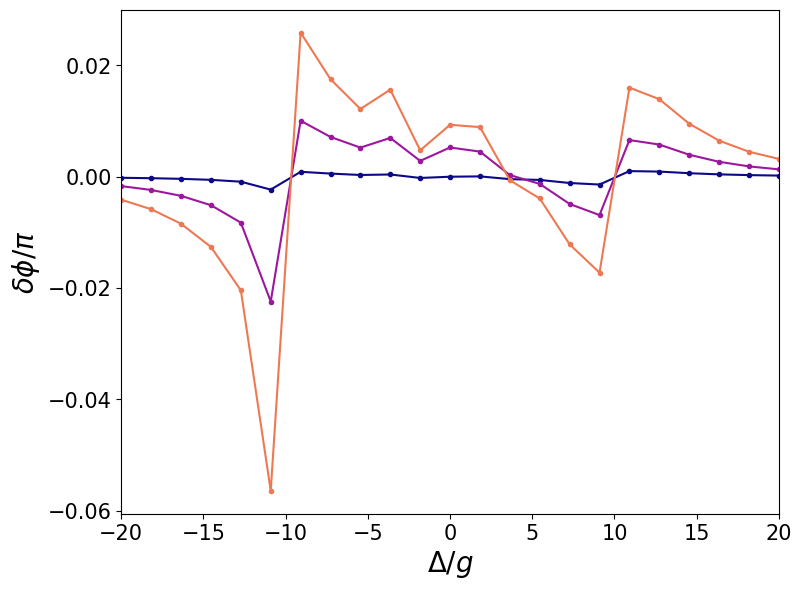

In [17]:
w_0=1
g=0.001*w_0
p=0.005*g

x=0*g

k=5*g
J=0*g

def f():
    if acoplamiento=='lineal':
        return 1
    elif acoplamiento=='bs':
        return sqrtN

def pr(estado):
    return estado.unit()*estado.unit().dag()


fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
delta_list=np.linspace(-20*g,20*g,23)

for j,gamma in enumerate([0.01*g,0.1*g,0.25*g]):
    print(f'-------GAMMA {gamma/g}g------------')
    colors=mpl.colormaps['plasma'](np.linspace(0,1,3+1))
    deltafg=np.zeros(len(delta_list))
    for i,delta in enumerate(delta_list):
        print(f'---Delta {delta/g}g')
        
        
        '''---Hamiltoniano---'''

        H=x*n2 + delta/2*(sz1+sz2) + g*((sm1+sm2)*f()*a.dag()+(sp1+sp2)*a*f()) + 2*k*(sm1*sp2+sp1*sm2) + J*sz1*sz2
            
        '''---Simulacion numerica---'''
        T=2*np.pi/np.abs(rabi_freq(2,1,2,delta,g,k,J,x))
        t_final=3*T
        steps=6000

        psi0=(eg1+ge1).unit()
        l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*(sp1+sp2)]
        t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 
        sol_u=mesolve(H,psi0,t,c_ops=[])
        sol_d=mesolve(H,psi0,t,c_ops=l_ops)
        fg_u,arg,eigenvals_t_u = fases(sol_u)
        fg_d,arg,eigenvals_t_d = fases(sol_d)

        deltafg[i]=fg_d[-1]-fg_u[-1]

    ax_fg.plot(delta_list/g,deltafg/np.pi,color=colors[j],marker='.')

ax_fg.set_ylabel('$\delta\phi/\pi$',size=20)
ax_fg.set_xlabel('$\Delta/g$',size=20)
ax_fg.set_xlim(delta_list[0]/g,delta_list[-1]/g)

DEPENDENCIA CON REGIMEN DE ACOPLAMIENTO GAMMA

<>:44: SyntaxWarning: invalid escape sequence '\p'
<>:44: SyntaxWarning: invalid escape sequence '\p'
C:\Users\juego\AppData\Local\Temp\ipykernel_5040\1057744612.py:44: SyntaxWarning: invalid escape sequence '\p'
  ax_fg.set_ylabel('$\phi_g/\pi$',size=20)


Text(0.5, 0, '$t/T$')

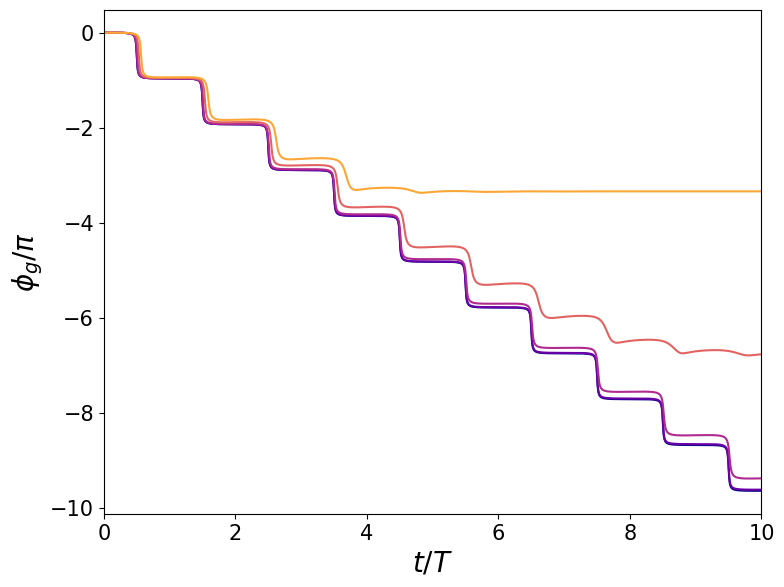

In [83]:
w_0=1
g=0.001*w_0
p=0.005*g
delta=0.1*g
x=0
k=0
J=0

fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
# fig_concu=plt.figure(figsize=(8,6))
# ax_concu=fig_concu.add_subplot()
colors=mpl.colormaps['plasma'](np.linspace(0,1,5+1))
for i,gamma in enumerate([0,0.01*g,0.1*g,0.5*g,g]):

    '''---Hamiltoniano---'''

    H=x*n2 + delta/2*(sz1+sz2) + g*((sm1+sm2)*f()*a.dag()+(sp1+sp2)*a*f()) + 2*k*(sm1*sp2+sp1*sm2) + J*sz1*sz2
        
    '''---Simulacion numerica---'''
    # T=2*np.pi/np.abs(rabi_freq(2,1,2,delta,g,k,J,x))
    T=np.pi/(np.sqrt(2*g**2+(k-J+delta/2-x/2)**2))


    ciclos=10
    t_final=ciclos*T
    steps=1000*ciclos
    
    psi0=(eg0+ge0).unit()
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*(sp1+sp2)]
    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 

    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    
    # concu=concurrence(sol_d.states)
    fg_d,arg,eigenvals_t_d = fases(sol_d)

    ax_fg.plot(t/T,fg_d/np.pi,color=colors[i])
    # ax_concu.plot(t/T,concu,color=colors[i])

# ax_concu.set_ylim(0,1)
ax_fg.set_xlim(0,ciclos)
# ax_concu.set_xlim(0,7)
ax_fg.set_ylabel('$\phi_g/\pi$',size=20)
# ax_concu.set_ylabel('$C_{AB}$',size=20)

# ax_concu.set_xlabel('$t/T$',size=20)
ax_fg.set_xlabel('$t/T$',size=20)

DEPENDENCIA CON EL DETUNNING D

<>:49: SyntaxWarning: invalid escape sequence '\p'
<>:49: SyntaxWarning: invalid escape sequence '\p'
C:\Users\juego\AppData\Local\Temp\ipykernel_11328\2018724055.py:49: SyntaxWarning: invalid escape sequence '\p'
  ax_fg.set_ylabel('$\phi_g/\pi$',size=20)


Text(0.5, 0, '$t/T$')

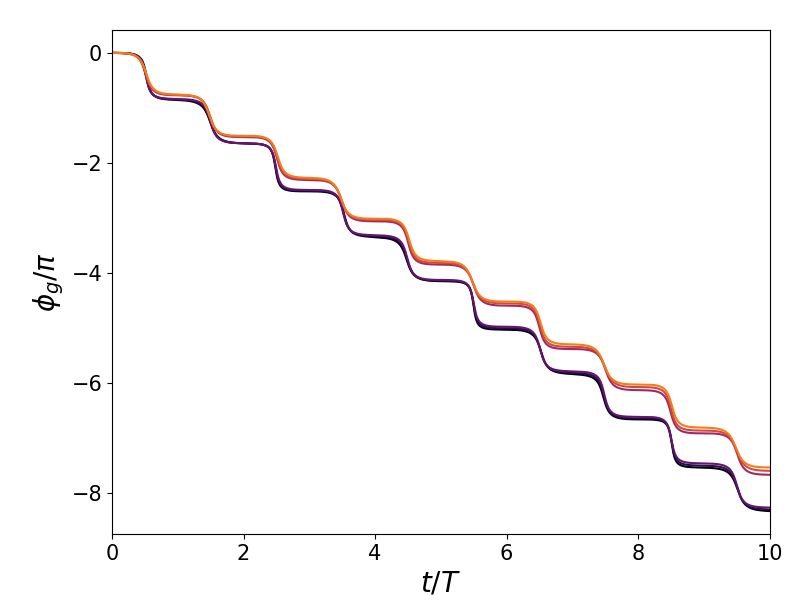

In [16]:
w_0=1
g=0.001*w_0
p=0#0.005*g

gamma=0#0.1*g

x=0*g
k=0.5*g
J=0

fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
# fig_concu=plt.figure(figsize=(8,6))
# ax_concu=fig_concu.add_subplot()
#delta_list=[0*g,0.1*g,0.5000001*g,g,2.50000001*g,5*g]

delta_list=[-0.7*g,-0.6*g,-0.5*g,0.5*g,0.6*g,0.7*g]
colors=mpl.colormaps['inferno'](np.linspace(0,1,len(delta_list)+2))

for i,delta in enumerate(delta_list):

    '''---Hamiltoniano---'''

    H=x*n2 + delta/2*(sz1+sz2) + g*((sm1+sm2)*f()*a.dag()+(sp1+sp2)*a*f()) + 2*k*(sm1*sp2+sp1*sm2) + J*sz1*sz2
        
    '''---Simulacion numerica---'''
    T=2*np.pi/np.abs(rabi_freq(2,1,2,delta,g,k,J,x))
    # T=np.pi/(np.sqrt(2*g**2+(k-J+delta/2-x/2)**2))

    ciclos=10
    t_final=ciclos*T
    steps=5000
    
    psi0=(eg1+ge1).unit()
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*(sp1+sp2)]
    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 

    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    
    # concu=concurrence(sol_d.states)
    fg_d,arg,eigenvals_t_d = fases(sol_d)

    ax_fg.plot(t/T,fg_d/np.pi,color=colors[i])
    # ax_concu.plot(t/T,concu,color=colors[i])

# ax_concu.set_ylim(0,1)
ax_fg.set_xlim(0,ciclos)
# ax_concu.set_xlim(0,7)
ax_fg.set_ylabel('$\phi_g/\pi$',size=20)
# ax_concu.set_ylabel('$C_{AB}$',size=20)

# ax_concu.set_xlabel('$t/T$',size=20)
ax_fg.set_xlabel('$t/T$',size=20)

DEPENDENCIA CON EL MEDIO KERR X

<>:49: SyntaxWarning: invalid escape sequence '\p'
<>:49: SyntaxWarning: invalid escape sequence '\p'
C:\Users\juego\AppData\Local\Temp\ipykernel_4848\2946978178.py:49: SyntaxWarning: invalid escape sequence '\p'
  ax_fg.set_ylabel('$\phi_g/\pi$',size=20)


Text(0.5, 0, '$t/T$')

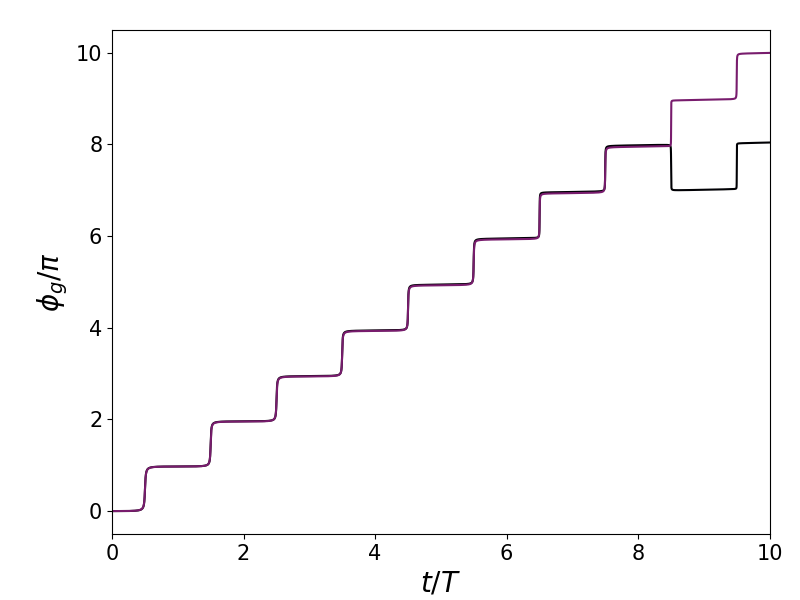

In [ ]:
w_0=1
g=0.001*w_0
p=0.005*g
gamma=0.1*g

delta=0.5*g

k=0*g
J=0

fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
# fig_concu=plt.figure(figsize=(8,6))
# ax_concu=fig_concu.add_subplot()
chi_list=[0.00001*g,0.1*g,0.33333*delta+2/3*(k-J),0.5000000001*delta,1.0000001*delta-2*(k-J),g,2*g,5*g]
# chi_list=[0.00001*g,0.1*g,0.33333*g,0.5000000001*g,g,2*g,5*g]
# chi_list=[0.36*delta,0.37*delta]
colors=mpl.colormaps['inferno'](np.linspace(0,1,len(chi_list)+2))
for i,x in enumerate(chi_list):

    '''---Hamiltoniano---'''

    H=x*n2 + delta/2*(sz1+sz2) + g*((sm1+sm2)*f()*a.dag()+(sp1+sp2)*a*f()) + 2*k*(sm1*sp2+sp1*sm2) + J*sz1*sz2
        
    '''---Simulacion numerica---'''
    T=2*np.pi/np.abs(rabi_freq(2,1,2,delta,g,k,J,x))
    # T=np.pi/(np.sqrt(2*g**2+(k-J+delta/2-x/2)**2))
    

    ciclos=10
    t_final=ciclos*T
    steps=20000
    
    psi0=(eg1+ge1).unit()
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*(sp1+sp2)]
    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 

    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    
    # concu=concurrence(sol_d.states)
    fg_d,arg,eigenvals_t_d = fases(sol_d)

    ax_fg.plot(t/T,fg_d/np.pi,color=colors[i])
    # ax_concu.plot(t/T,concu,color=colors[i])

# ax_concu.set_ylim(0,1)
ax_fg.set_xlim(0,ciclos)
# ax_concu.set_xlim(0,7)
ax_fg.set_ylabel('$\phi_g/\pi$',size=20)
# ax_concu.set_ylabel('$C_{AB}$',size=20)

# ax_concu.set_xlabel('$t/T$',size=20)
ax_fg.set_xlabel('$t/T$',size=20)

DEPENDENCIA CON LA INTERACCION INTERATOMICA K-J

<>:47: SyntaxWarning: invalid escape sequence '\p'
<>:47: SyntaxWarning: invalid escape sequence '\p'
C:\Users\juego\AppData\Local\Temp\ipykernel_5040\1123382992.py:47: SyntaxWarning: invalid escape sequence '\p'
  ax_fg.set_ylabel('$\phi_g/\pi$',size=20)


Text(0.5, 0, '$t/T$')

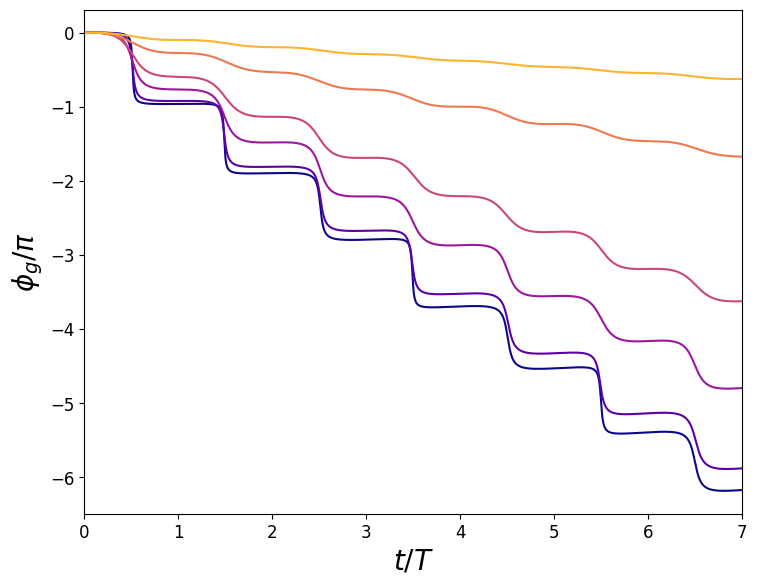

In [109]:
w_0=1
g=0.001*w_0
p=0.005*g
gamma=0.1*g

delta=0.5*g
x=0*g
J=0


fig_fg=plt.figure(figsize=(8,6))
ax_fg=fig_fg.add_subplot()
# fig_concu=plt.figure(figsize=(8,6))
# ax_concu=fig_concu.add_subplot()
k_list=[0,0.1*g,0.5*g,g,2.5*g,5*g]
colors=mpl.colormaps['plasma'](np.linspace(0,1,len(k_list)+1))
for i,k in enumerate(k_list):

    '''---Hamiltoniano---'''

    H=x*n2 + delta/2*(sz1+sz2) + g*((sm1+sm2)*f()*a.dag()+(sp1+sp2)*a*f()) + 2*k*(sm1*sp2+sp1*sm2) + J*sz1*sz2
        
    '''---Simulacion numerica---'''
    T=2*np.pi/np.abs(rabi_freq(2,1,2,delta,g,k,J,x))
    # T=np.pi/(np.sqrt(2*g**2+(k-J+delta/2-x/2)**2))


    ciclos=7
    t_final=ciclos*T
    steps=20000
    
    psi0=(eg1+ge1).unit()
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*(sp1+sp2)]
    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 

    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    
    # concu=concurrence(sol_d.states)
    fg_d,arg,eigenvals_t_d = fases(sol_d)

    ax_fg.plot(t/T,fg_d/np.pi,color=colors[i])
    # ax_concu.plot(t/T,concu,color=colors[i])

# ax_concu.set_ylim(0,1)
ax_fg.set_xlim(0,ciclos)
# ax_concu.set_xlim(0,7)
ax_fg.set_ylabel('$\phi_g/\pi$',size=20)
# ax_concu.set_ylabel('$C_{AB}$',size=20)

# ax_concu.set_xlabel('$t/T$',size=20)
ax_fg.set_xlabel('$t/T$',size=20)

PLOTS PARA ENTENDER PQ ES SIMILAR PARA DETUNNINGS BAJOS Y EN EL MEDIO SE VA A LA CACA Y DESPUES ES IGUAL DEVUELTA

coherenciasRunTime: 0.203125
-----Tiempos de computo----
expectRunTime: 0.4375
pasajeRunTime: no existe
entropiaRunTime: 1.390625


c:\Users\juego\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\juego\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


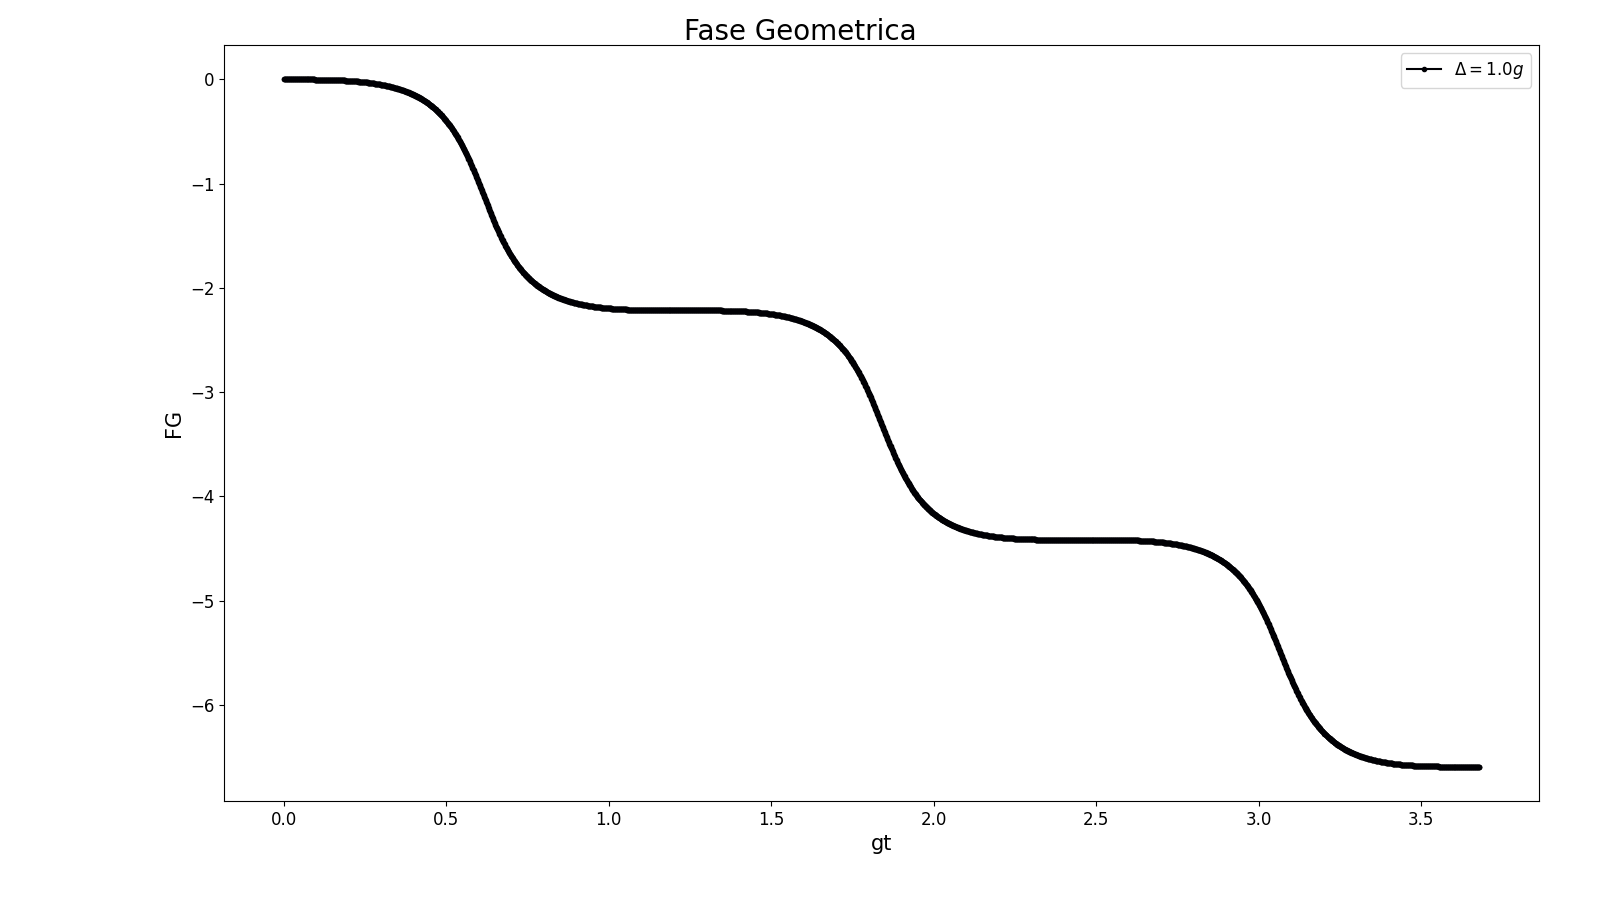

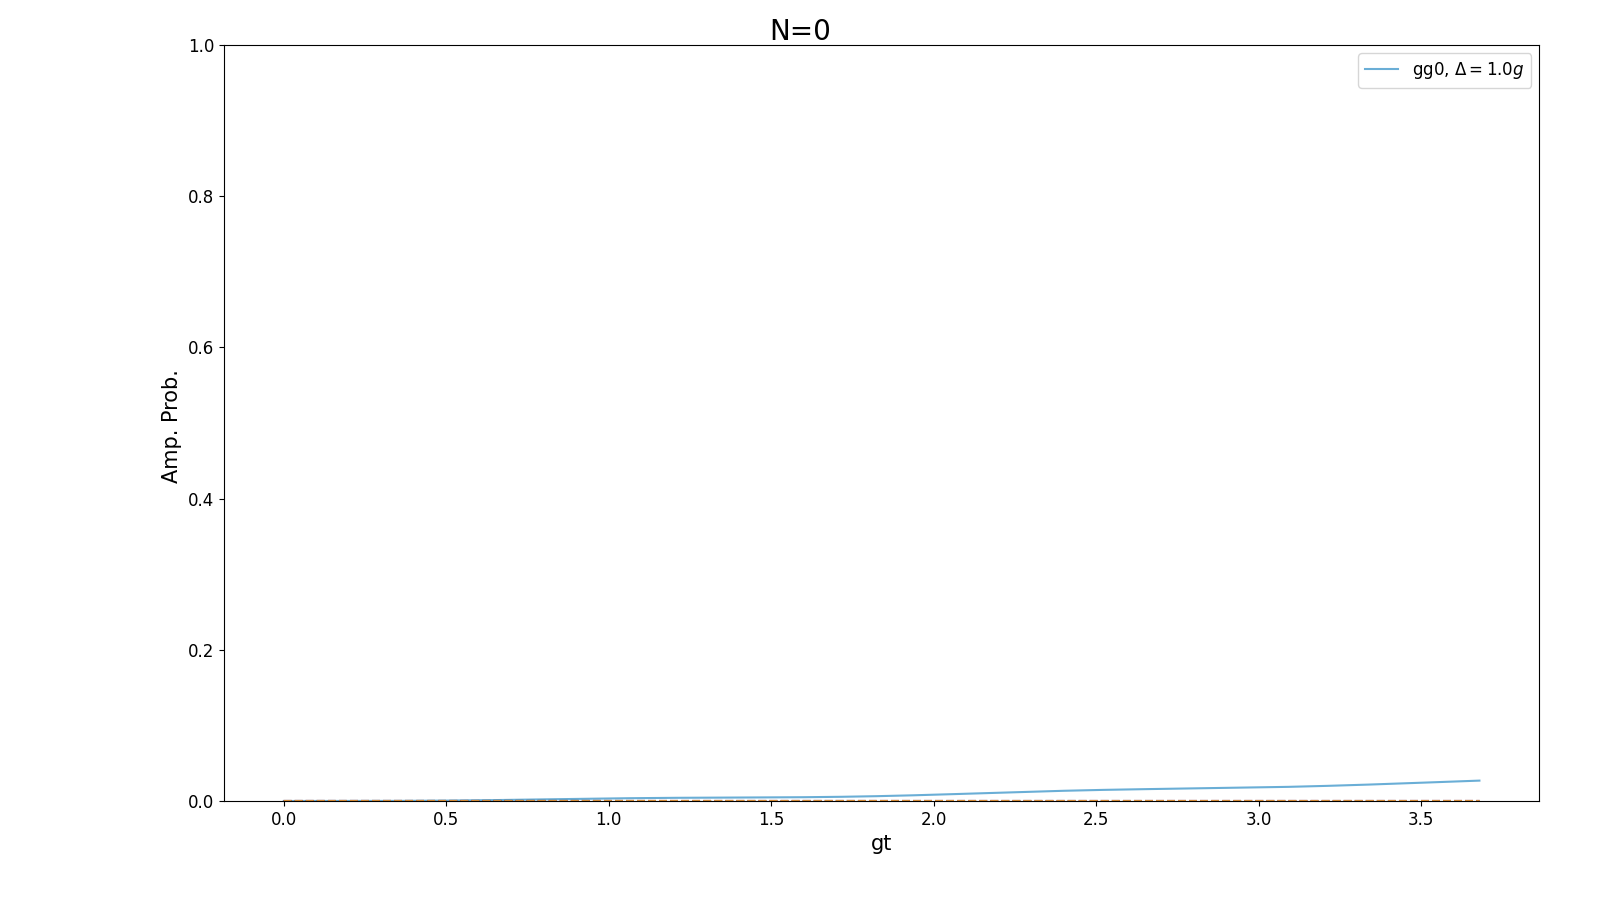

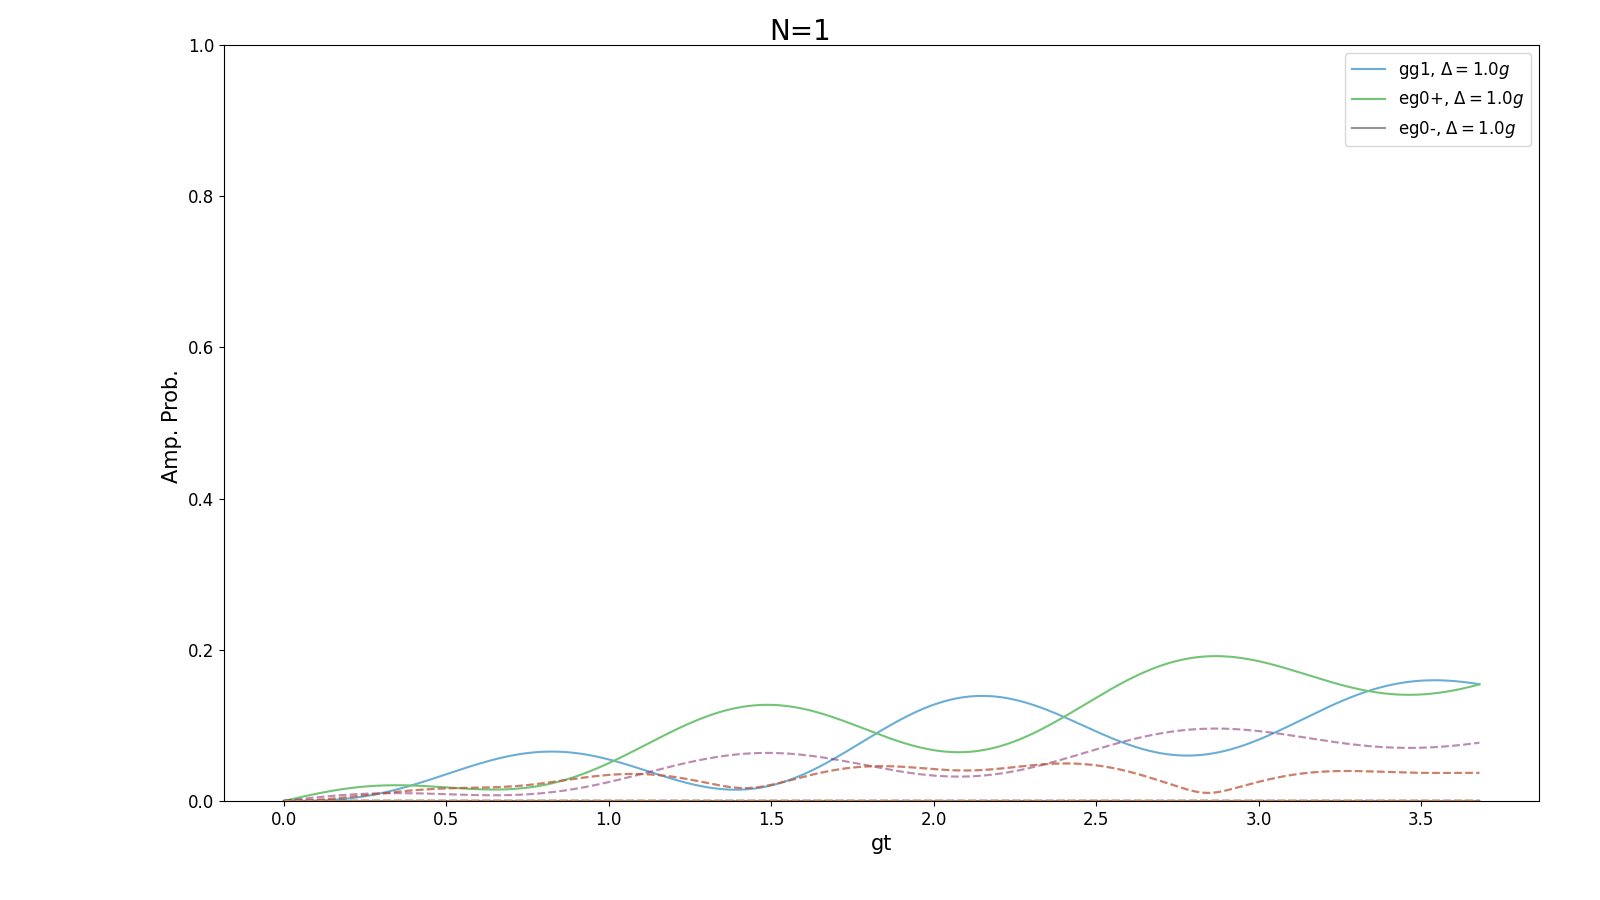

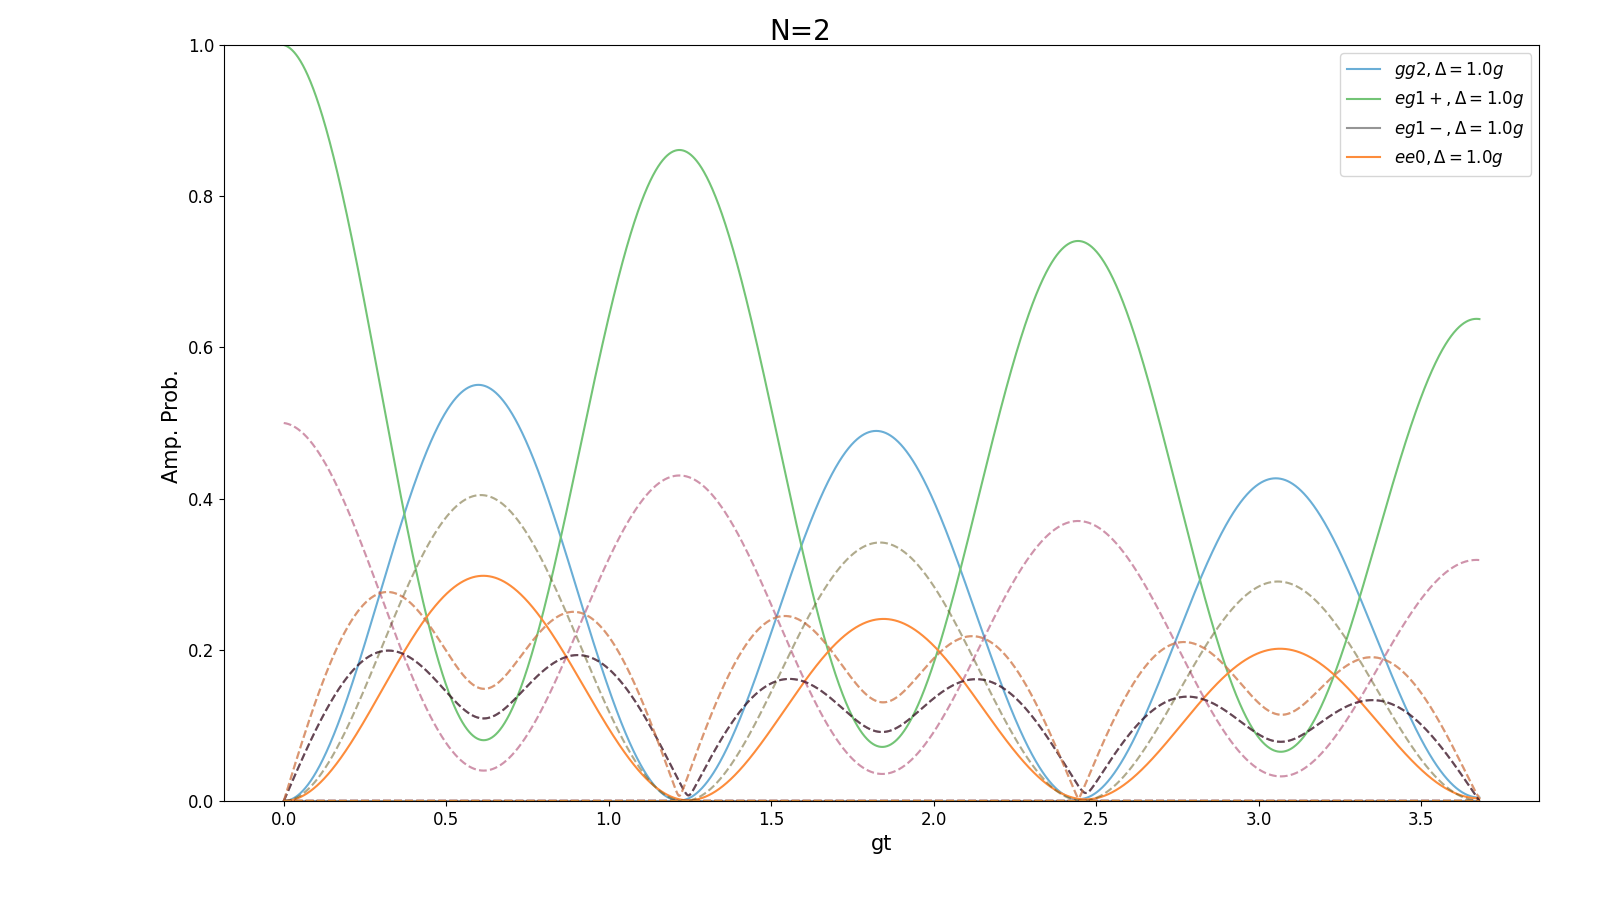

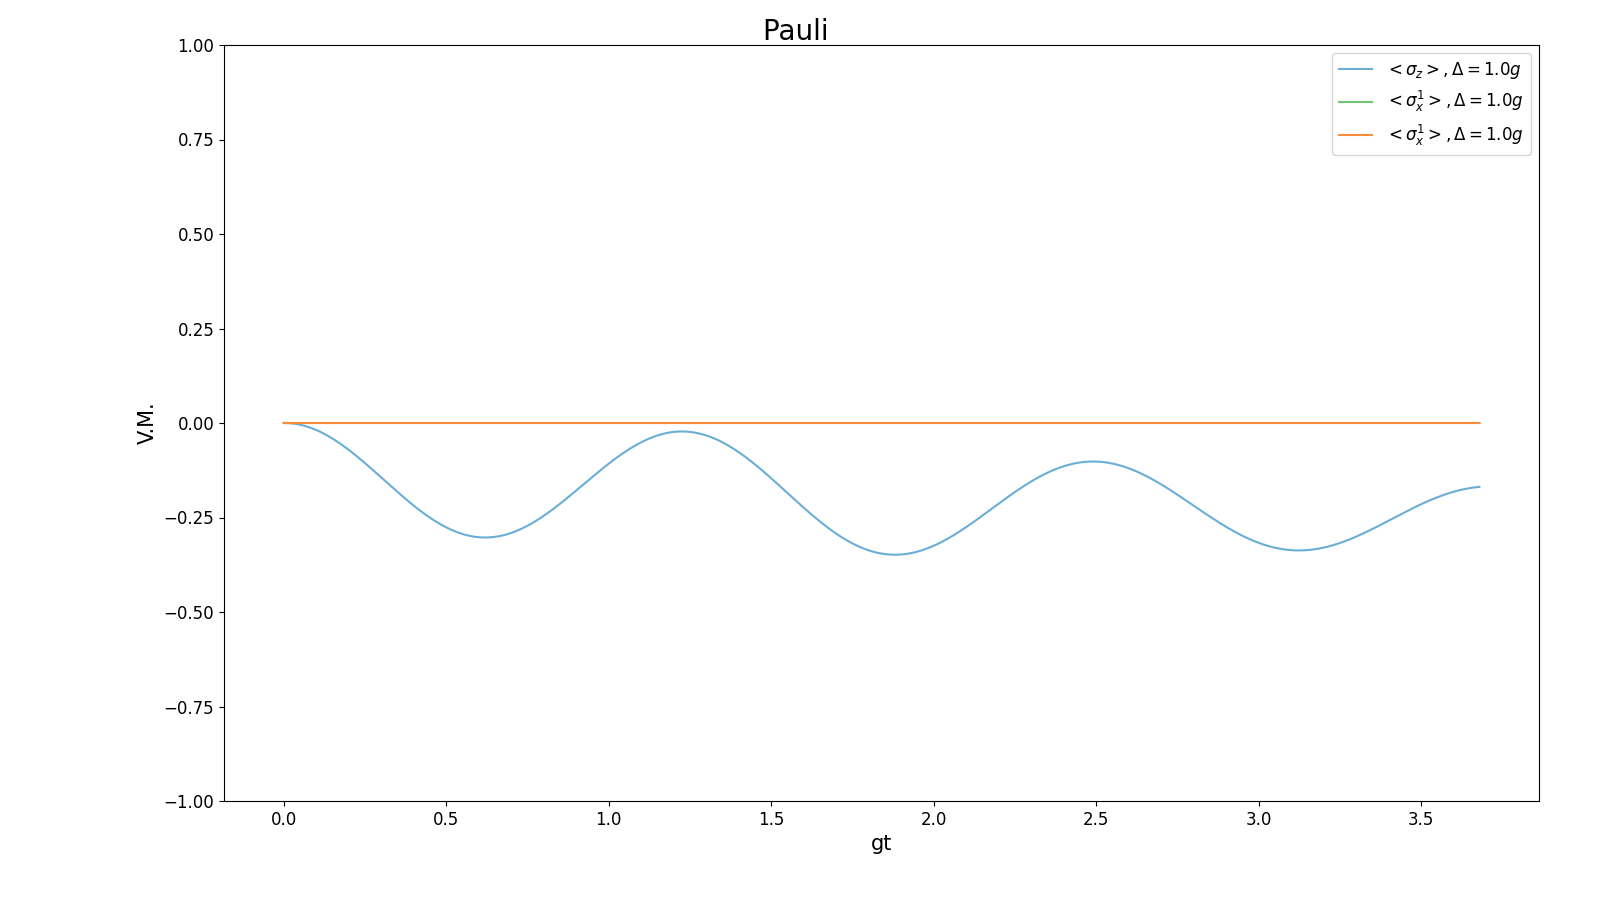

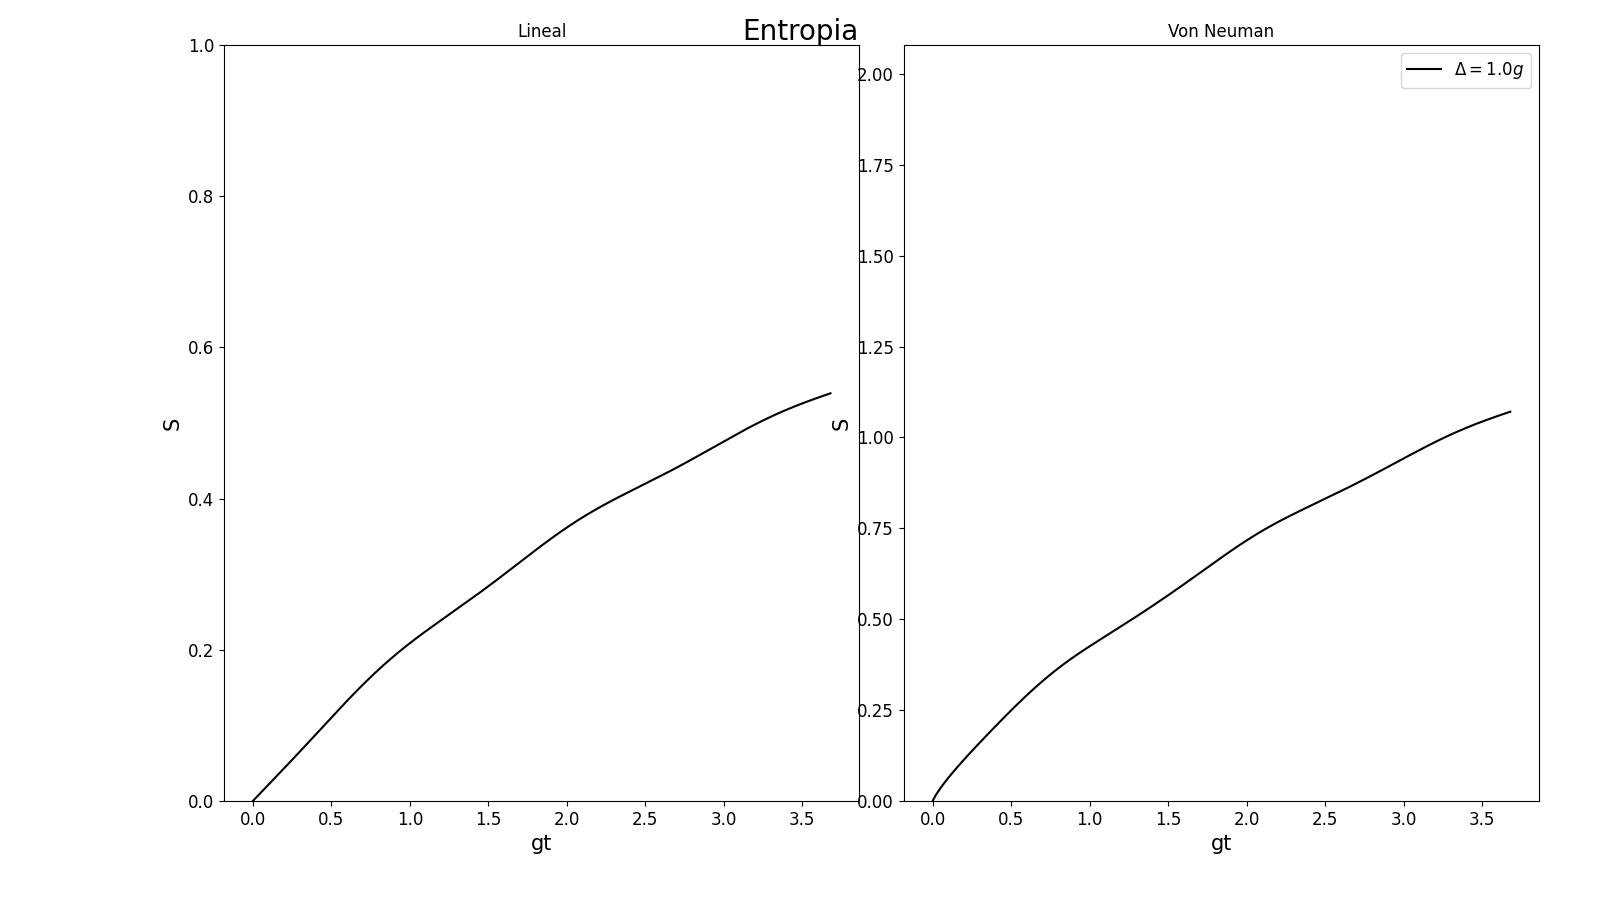

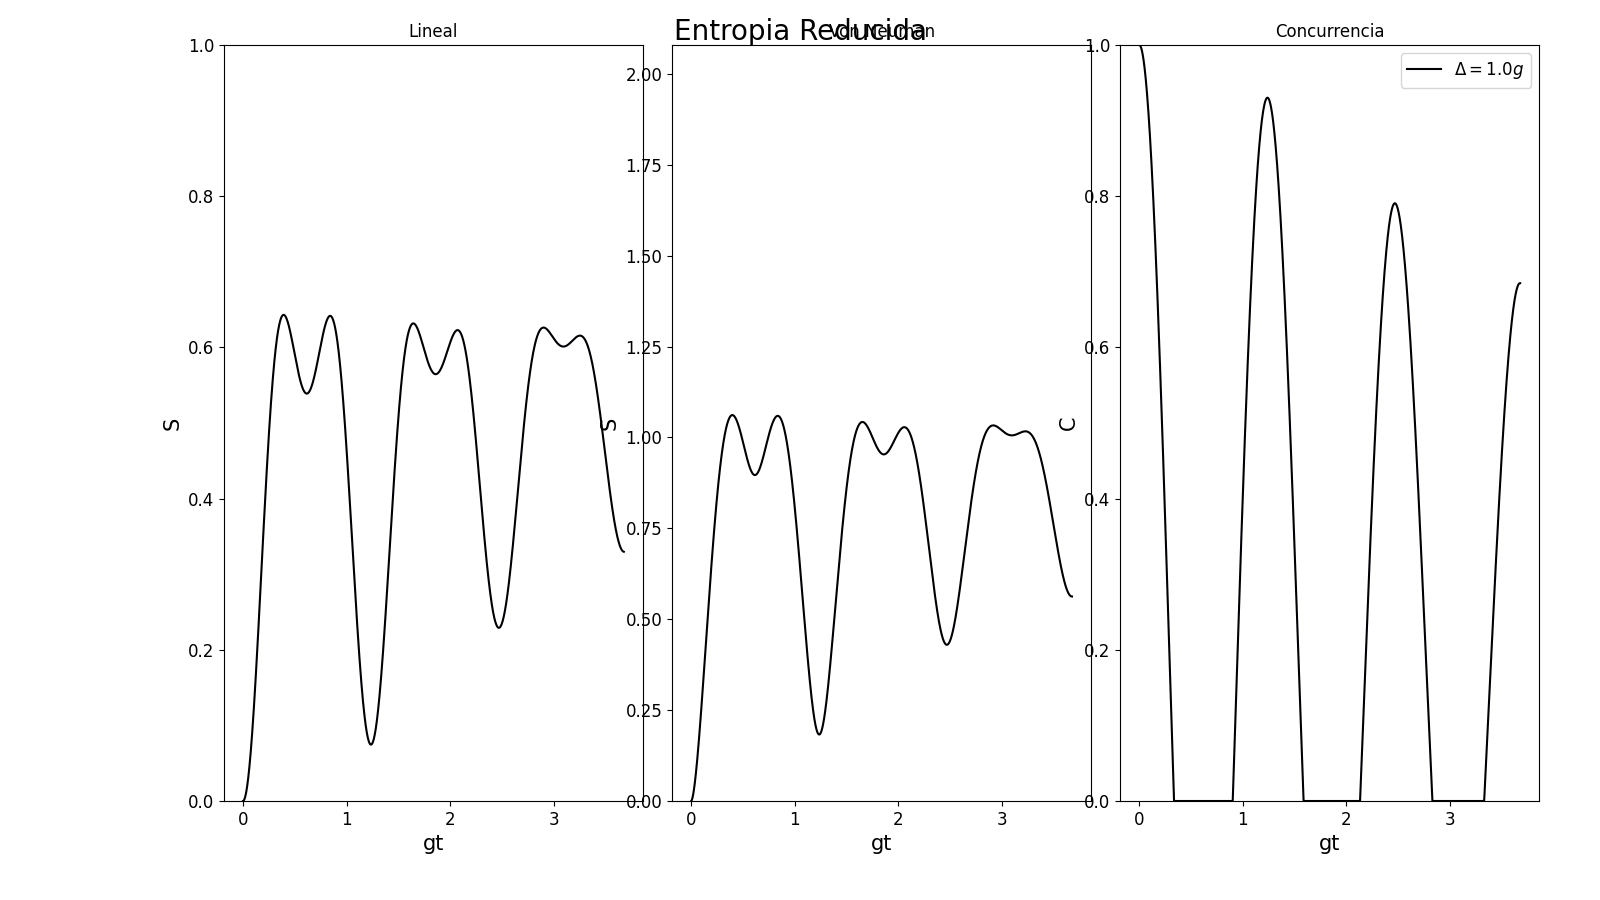

In [75]:
w0=1
g=0.001*w0

p=0.005*g
gamma=0.1*g

d=1*g
x=0.5*g

J=0
k=g

alpha=1

psi0=(eg1+ge1).unit()  #gg1#(tensor(tensor(e,gr)+tensor(gr,gr),basis(3,0)+basis(3,1))).unit()#1/10*(gg0*gg0.dag()+(eg0+ge0).unit()*(eg0+ge0).unit().dag()+(eg0-ge0).unit()*(eg0-ge0).unit().dag()+gg1*gg1.dag()+ee0*ee0.dag()+(eg1+ge1).unit()*(eg1+ge1).unit().dag()+(eg1-ge1).unit()*(eg1-ge1).unit().dag()+gg2*gg2.dag()+(eg2+ge2).unit()*(eg2+ge2).unit().dag()+(eg2-ge2).unit()*(eg2-ge2).unit().dag())
# print(psi0)
steps=3000
T=2*np.pi/np.abs(rabi_freq(2,1,2,d,g,k,J,x))

t_final=3*T
t=np.linspace(0,t_final,steps)

# jcm_lib.plot_gamma_simu(w0,delta=0,chi=0,g=g,k=0,J=0,gamma_list=[0,0.1*g,0.5*g,g,2*g],alpha=alpha,psi0=psi0,disipation=True,steps=steps,t_final=t_final)

# jcm_lib.plot_gamma_simu(w0,delta=d,chi=x,g=g,k=k,J=J,gamma_list=[0,0.1*g,0.5*g,2*g],alpha=alpha,psi0=psi0,disipation=True,steps=steps,t_final=t_final)
d=[d]
plot_delta_simu(w0,d,x,g,k,J,gamma,p,1,psi0,True,steps=steps,t_final=t_final)

DIFERENCIA FG UNITARIA Y DISIPATIVA

In [ ]:
w0=1
g=0.001*w0

p=0.005*g
gamma=0.1*g

d=0
x=0

J=0
k=0

alpha=1

psi0=(eg1+ge1).unit()  #gg1#(tensor(tensor(e,gr)+tensor(gr,gr),basis(3,0)+basis(3,1))).unit()#1/10*(gg0*gg0.dag()+(eg0+ge0).unit()*(eg0+ge0).unit().dag()+(eg0-ge0).unit()*(eg0-ge0).unit().dag()+gg1*gg1.dag()+ee0*ee0.dag()+(eg1+ge1).unit()*(eg1+ge1).unit().dag()+(eg1-ge1).unit()*(eg1-ge1).unit().dag()+gg2*gg2.dag()+(eg2+ge2).unit()*(eg2+ge2).unit().dag()+(eg2-ge2).unit()*(eg2-ge2).unit().dag())
# print(psi0)
steps=3000
T=2*np.pi/np.abs(rabi_freq(2,1,2,d,g,k,J,x))

t_final=3*T
t=np.linspace(0,t_final,steps)

# jcm_lib.plot_gamma_simu(w0,delta=0,chi=0,g=g,k=0,J=0,gamma_list=[0,0.1*g,0.5*g,g,2*g],alpha=alpha,psi0=psi0,disipation=True,steps=steps,t_final=t_final)

# jcm_lib.plot_gamma_simu(w0,delta=d,chi=x,g=g,k=k,J=J,gamma_list=[0,0.1*g,0.5*g,2*g],alpha=alpha,psi0=psi0,disipation=True,steps=steps,t_final=t_final)
delta_list=[0.65*g,0.67*g,0.66*g]
colors=mpl.colormaps['inferno'](np.linspace(0,1,len(delta_list)+2))
fig=plt.figure(figsize=(8,6))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212,sharex=ax1)
for l,d in enumerate(delta_list):
    fg_u,fg_d,concu_u,concu_d=simu_unit_y_disip(w0,g,k,J,d,x,gamma,p,1,(eg1+ge1).unit(),t_final,steps)
    ax1.plot(t/T,fg_u,color=colors[l],label=d/g)
    ax1.plot(t/T,fg_d,color=colors[l],linestyle='dashed')
    ax2.plot(t/T,fg_d-fg_u,color=colors[l])

ax1.grid()
ax2.grid()
ax1.legend()
plt.show()


robustext

<>:33: SyntaxWarning: invalid escape sequence '\c'
<>:34: SyntaxWarning: invalid escape sequence '\d'
<>:33: SyntaxWarning: invalid escape sequence '\c'
<>:34: SyntaxWarning: invalid escape sequence '\d'
C:\Users\juego\AppData\Local\Temp\ipykernel_4848\3881221043.py:33: SyntaxWarning: invalid escape sequence '\c'
  ax_rob3t.set_xlabel('$\chi/g$')
C:\Users\juego\AppData\Local\Temp\ipykernel_4848\3881221043.py:34: SyntaxWarning: invalid escape sequence '\d'
  ax_rob3t.set_ylabel('$\delta \phi/\pi$')


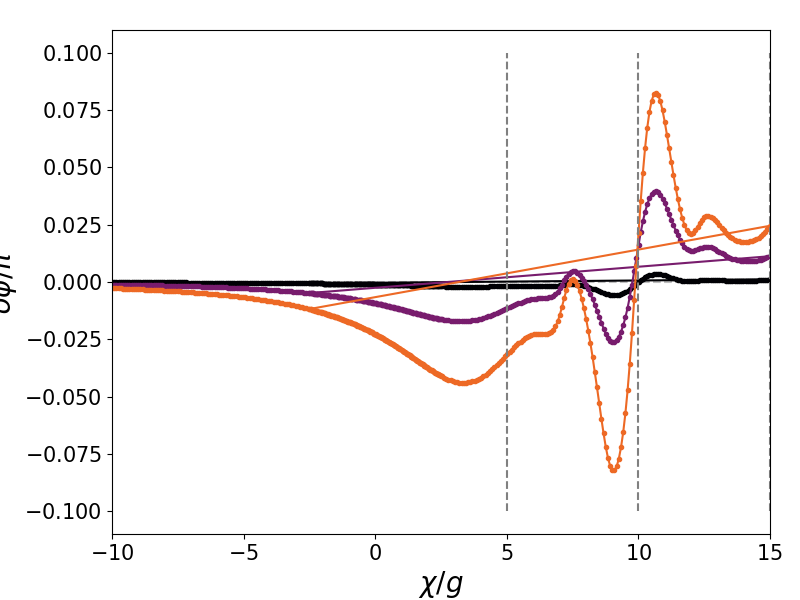

In [41]:
w_0=1
g=0.001*w_0

# gamma_list=[0.01*g,0.1*g,0.25*g]
# p=0.005*g

d=0*g
x=5*g

J=0*g
k=5*g


#'eg0-ge0+gg1','w(2)','eg0+ge0','eg0'
psi0Name='eg1+ge1'

# delta_fg_3T=np.loadtxt(rf'D:\Estudios\Tesis\imagenes analisis\t-ordenado\5\robustez\delta\{psi0Name} k={k/g}g x={x/g}g J={J/g}g rebustez3t fg delta.txt')
delta_fg_3T=np.loadtxt(rf'D:\Estudios\Tesis\imagenes analisis\t-ordenado\5\robustez\delta\{psi0Name} k={k/g}g x={x/g}g J={J/g}g delta.txt')
# delta_fg_3T=np.loadtxt(rf'D:\Estudios\Tesis\imagenes analisis\t-ordenado\5\robustez\chi\{psi0Name} d={d/g}g k={k/g}g J={J/g}g chi.txt')
# delta_fg_3T=np.loadtxt(rf'D:\Estudios\Tesis\imagenes analisis\t-ordenado\5\robustez\delta\{psi0Name} k={k/g}g x={x/g}g J={J/g}g delta.txt')
# delta_fg_10T=np.loadtxt(rf'D:\Estudios\Tesis\imagenes analisis\t-ordenado\4\concu\{psi0Name} k={k/g}g x={x/g}g J={J/g}g rebustez10t fg delta.txt')
xmin=np.min(delta_fg_3T[0])
xmax=np.max(delta_fg_3T[0])
# fgmin=np.min(delta_fg_3T[1:])
# fgmax=np.max(delta_fg_3T[1:])
colors=mpl.colormaps['inferno'](np.linspace(0,1,3+1))

fig_rob3t=plt.figure(figsize=(8,6))
ax_rob3t=fig_rob3t.add_subplot()
ax_rob3t.set_xlim(xmin/g,xmax/g)
# ax_rob3t.set_ylim(-0.6,0.6)
ax_rob3t.hlines(0,xmin/g,xmax/g,colors='grey',linestyles='dashed',alpha=0.5)
ax_rob3t.set_xlabel('$\chi/g$')
ax_rob3t.set_ylabel('$\delta \phi/\pi$')
ax_rob3t.ticklabel_format(style='scientific',scilimits=(-2,2),useMathText=True)

# print(delta_fg_3T[0])
for i in range(1,len(delta_fg_3T)):
    ax_rob3t.plot(delta_fg_3T[0]/g,delta_fg_3T[i]/np.pi,color=colors[i-1],marker='.')


#lineas en funcion del detunning
ax_rob3t.vlines([3*x/g-2*(k-J)/g,x/g+2*(k-J)/g,2*x/g],-0.1,0.1,linestyles='dashed',colors='grey')

#lineas en funcion de chi
# ax_rob3t.vlines([d/3/g+2/3*(k-J)/g,d/g-2*(k-J)/g,d/2/g],-0.1,0.1,linestyles='dashed',colors='grey')

#lineas en funcion de k
# ax_rob3t.vlines([-d/2/g+3*x/g/2,d/g/2-x/g/2],fgmin/g,fgmax/g,linestyles='dashed',colors='grey')

plt.show()

<>:35: SyntaxWarning: invalid escape sequence '\D'
<>:36: SyntaxWarning: invalid escape sequence '\d'
<>:35: SyntaxWarning: invalid escape sequence '\D'
<>:36: SyntaxWarning: invalid escape sequence '\d'
C:\Users\juego\AppData\Local\Temp\ipykernel_11388\3516806372.py:35: SyntaxWarning: invalid escape sequence '\D'
  ax_rob.set_xlabel('$\Delta/g$')
C:\Users\juego\AppData\Local\Temp\ipykernel_11388\3516806372.py:36: SyntaxWarning: invalid escape sequence '\d'
  ax_rob.set_ylabel('$\delta \phi/\pi$')


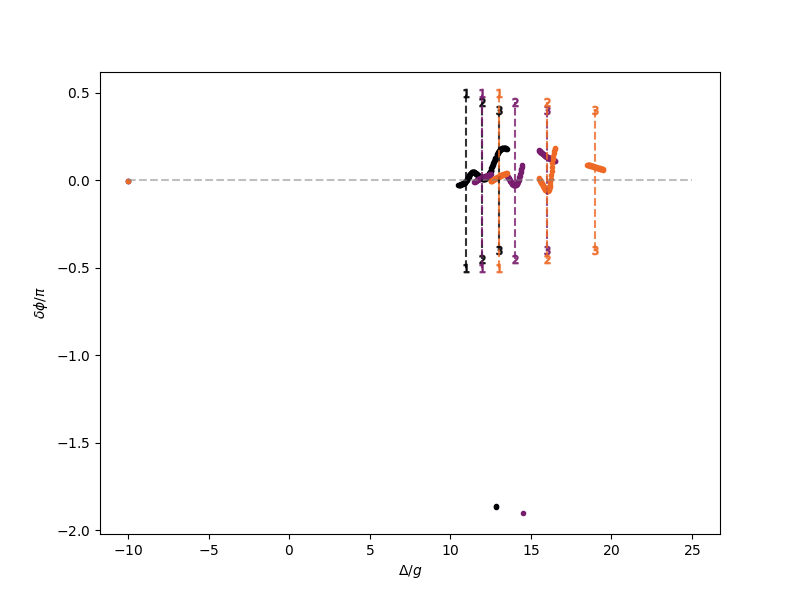

In [65]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib widget
w_0=1
g=0.001*w_0

# gamma_list=[0.01*g,0.1*g,0.25*g]
# p=0.005*g

d=0*g
x=5*g

J=0*g
k=2.5*g


#'eg0-ge0+gg1','w(2)','eg0+ge0','eg0'
psi0Name='ee0'

# delta_fg_3T=np.loadtxt(rf'D:\Estudios\Tesis\imagenes analisis\t-ordenado\5\robustez\delta\{psi0Name} k={k/g}g x={x/g}g J={J/g}g rebustez3t fg delta.txt')
# delta_fg=np.loadtxt(rf'D:\Estudios\Tesis\imagenes analisis\t-ordenado\5\robustez\delta-chi\{psi0Name} k={k/g}g J={J/g}g delta-chi.txt')
delta_fg=np.loadtxt(rf'D:\Estudios\Tesis\imagenes analisis\t-ordenado\5\robustez\delta-chi\{psi0Name} k={k/g}g J={J/g}g delta-chi.txt')
# delta_fg_3T=np.loadtxt(rf'D:\Estudios\Tesis\imagenes analisis\t-ordenado\5\robustez\chi\{psi0Name} d={d/g}g k={k/g}g J={J/g}g chi.txt')
# delta_fg_3T=np.loadtxt(rf'D:\Estudios\Tesis\imagenes analisis\t-ordenado\5\robustez\delta\{psi0Name} k={k/g}g x={x/g}g J={J/g}g delta.txt')
# delta_fg_10T=np.loadtxt(rf'D:\Estudios\Tesis\imagenes analisis\t-ordenado\4\concu\{psi0Name} k={k/g}g x={x/g}g J={J/g}g rebustez10t fg delta.txt')

colors=mpl.colormaps['inferno'](np.linspace(0,1,len(delta_fg)+1))

fig_rob=plt.figure(figsize=(8,6))
ax_rob=fig_rob.add_subplot()
# ax_rob3t.set_xlim(np.min(delta_fg_3T[0])/g,np.max(delta_fg_3T[0])/g)
# ax_rob3t.set_ylim(-0.6,0.6)
ax_rob.hlines(0,-10,25,colors='grey',linestyles='dashed',alpha=0.5)
ax_rob.set_xlabel('$\Delta/g$')
ax_rob.set_ylabel('$\delta \phi/\pi$')
ax_rob.ticklabel_format(style='scientific',scilimits=(-1,2),useMathText=True)

xmin=-0.5
xmax=0.5
# print(delta_fg_3T[0])
# x=[0, 0.0005, 0.001, 0.0025, 0.0035, 0.005]
x=[0.006,0.007,0.008]
markes=['o','v','s','x','^','.',' ']
for i in range(int(len(delta_fg)/2)):
    ax_rob.scatter(delta_fg[2*i]/g,delta_fg[2*i+1]/np.pi,color=colors[2*i],marker='.')

    #lineas en funcion del detunning
    ax_rob.plot([3*x[i]/g-2*(k-J)/g,3*x[i]/g-2*(k-J)/g],[xmin+0.1,xmax-0.1],linestyle='dashed',marker='$3$',color=colors[2*i],alpha=0.8)
    ax_rob.plot([x[i]/g+2*(k-J)/g,x[i]/g+2*(k-J)/g],[xmin,xmax],linestyle='dashed',marker='$1$',color=colors[2*i],alpha=0.8)
    ax_rob.plot([2*x[i]/g,2*x[i]/g],[xmin+0.05,xmax-0.05],linestyle='dashed',marker='$2$',color=colors[2*i],alpha=0.8)

plt.show()

<>:48: SyntaxWarning: invalid escape sequence '\c'
<>:49: SyntaxWarning: invalid escape sequence '\D'
<>:68: SyntaxWarning: invalid escape sequence '\c'
<>:87: SyntaxWarning: invalid escape sequence '\c'
<>:48: SyntaxWarning: invalid escape sequence '\c'
<>:49: SyntaxWarning: invalid escape sequence '\D'
<>:68: SyntaxWarning: invalid escape sequence '\c'
<>:87: SyntaxWarning: invalid escape sequence '\c'
C:\Users\juego\AppData\Local\Temp\ipykernel_11388\743053897.py:48: SyntaxWarning: invalid escape sequence '\c'
  ax_r1.set_xlabel('$\chi/g$',fontsize=20)
C:\Users\juego\AppData\Local\Temp\ipykernel_11388\743053897.py:49: SyntaxWarning: invalid escape sequence '\D'
  ax_r1.set_ylabel('$\Delta/g$',fontsize=20)
C:\Users\juego\AppData\Local\Temp\ipykernel_11388\743053897.py:68: SyntaxWarning: invalid escape sequence '\c'
  ax_r2.set_xlabel('$\chi/g$',fontsize=20)
C:\Users\juego\AppData\Local\Temp\ipykernel_11388\743053897.py:87: SyntaxWarning: invalid escape sequence '\c'
  ax_r3.set_xlabe

---- k=0 -----
ee0
Δ=0.91x+0.02(k-J)
eg1
Δ=2.02x+0.03(k-J)
gg2
Δ=2.07x+-0.04(k-J)
---- k=g ----
ee0
Δ=0.87x+2.27(k-J)
eg1
Δ=2.04x+-0.10(k-J)
gg2
Δ=2.05x+-0.08(k-J)
---- k=2.5g ----
ee0
Δ=0.90x+2.18(k-J)
eg1
Δ=2.03x+-0.05(k-J)
gg2
Δ=2.67x+-1.61(k-J)


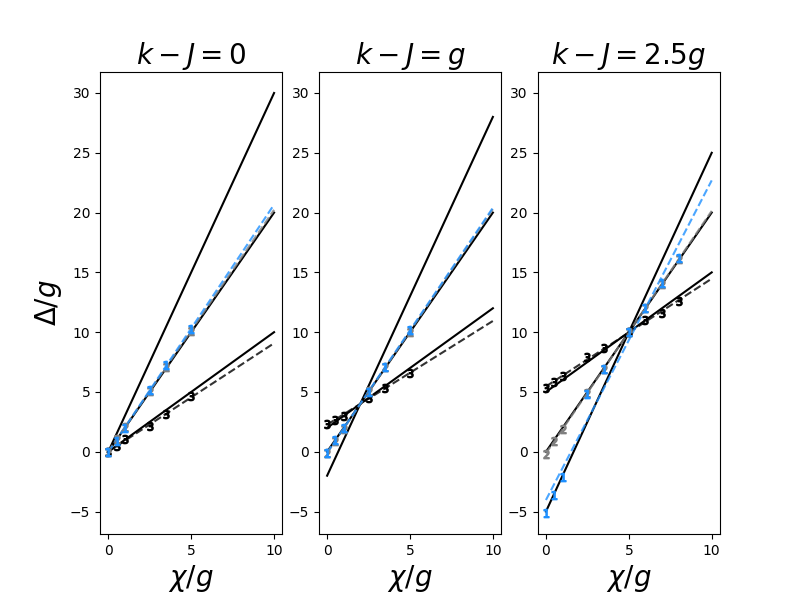

In [67]:
from scipy.optimize import curve_fit
def func(x,a,b):
    return a*x+b


ee0_k0=[0,0.5,1.03,2.13,3.13,4.64]
ee0_k1=[2.35,2.69,3.01,4.5,5.3,6.6]
ee0_k25=[5.34,5.84,6.35,7.9,8.7,10,11.01,11.61,12.60]

eg1_k0=[0,1.05,2.08,5.1,7.1,10.12]
eg1_k1=[-0.12,0.91,1.93,5.04,7.07,10.05]
eg1_k25=[-0.15,0.9,1.9,4.92,6.95,10,12.05,14.06,16.08]

gg2_k0=[0,0.91,2.014,5.17,7.29,10.25]
gg2_k1=[-0.09,0.96,2,5,7.05,10.2]
gg2_k25=[-5.12,-3.6,-2.1,4.8,6.95,10,12.0,14.09,16.2]

chi_list=[0,0.5,1,2.5,3.5,5]
chi_list_grande=[0,0.5,1,2.5,3.5,5,6,7,8]

chi=np.linspace(0,10,1000)

popt_ee0_k0,pcov_ee0_k0=curve_fit(func,chi_list,ee0_k0)
popt_eg1_k0,pcov_eg1_k0=curve_fit(func,chi_list,eg1_k0)
popt_gg2_k0,pcov_gg2_k0=curve_fit(func,chi_list,gg2_k0)

popt_ee0_k1,pcov_ee0_k1=curve_fit(func,chi_list,ee0_k1)
popt_eg1_k1,pcov_eg1_k1=curve_fit(func,chi_list,eg1_k1)
popt_gg2_k1,pcov_eg1_k1=curve_fit(func,chi_list,gg2_k1)

popt_ee0_k25,pcov_ee0_k25=curve_fit(func,chi_list_grande,ee0_k25)
popt_eg1_k25,pcov_eg1_k25=curve_fit(func,chi_list_grande,eg1_k25)
popt_gg2_k25,pcov_gg2_k25=curve_fit(func,chi_list_grande,gg2_k25)

k=[0,1,2.5]
color2=['black','grey','dodgerblue']
color3=['blue','dodgerblue','deepskyblue']
fig_raices=plt.figure(figsize=(8,6))
ax_r1=fig_raices.add_subplot(131)
ax_r2=fig_raices.add_subplot(132,sharey=ax_r1)
ax_r3=fig_raices.add_subplot(133,sharey=ax_r1)

zorder=3
'''k-J=0'''
ax_r1.plot(chi,2*chi,color=color2[0])
ax_r1.plot(chi,chi+2*k[0],color=color2[0])
ax_r1.plot(chi,3*chi-2*k[0],color=color2[0])
ax_r1.set_xlabel('$\chi/g$',fontsize=20)
ax_r1.set_ylabel('$\Delta/g$',fontsize=20)
ax_r1.set_title('$k-J=0$',fontsize=20)

ax_r1.scatter(chi_list,ee0_k0,color=color2[0],marker='$3$',zorder=zorder)
ax_r1.scatter(chi_list,eg1_k0,color=color2[1],marker='$2$',zorder=zorder)
ax_r1.scatter(chi_list,gg2_k0,color=color2[2],marker='$1$',zorder=zorder)
ax_r1.plot(chi,func(chi,*popt_ee0_k0),color=color2[0],linestyle='dashed',alpha=0.8)
ax_r1.plot(chi,func(chi,*popt_eg1_k0),color=color2[1],linestyle='dashed',alpha=0.8)
ax_r1.plot(chi,func(chi,*popt_gg2_k0),color=color2[2],linestyle='dashed',alpha=0.8)
print('---- k=0 -----')
print('ee0',rf'Δ={popt_ee0_k0[0]:.2f}x+{popt_ee0_k0[1]:.2f}(k-J)',sep='\n')
print('eg1',rf'Δ={popt_eg1_k0[0]:.2f}x+{popt_eg1_k0[1]:.2f}(k-J)',sep='\n')
print('gg2',rf'Δ={popt_gg2_k0[0]:.2f}x+{popt_gg2_k0[1]:.2f}(k-J)',sep='\n')

'''k-J=1g'''
ax_r2.plot(chi,2*chi,color=color2[0])
ax_r2.plot(chi,chi+2*k[1],color=color2[0])
ax_r2.plot(chi,3*chi-2*k[1],color=color2[0])

ax_r2.set_xlabel('$\chi/g$',fontsize=20)
ax_r2.set_title('$k-J=g$',fontsize=20)

ax_r2.scatter(chi_list,ee0_k1,color=color2[0],marker='$3$',zorder=zorder)
ax_r2.plot(chi,func(chi,*popt_ee0_k1),color=color2[0],linestyle='dashed',alpha=0.8)
ax_r2.scatter(chi_list,eg1_k1,color=color2[1],marker='$2$',zorder=zorder)
ax_r2.plot(chi,func(chi,*popt_eg1_k1),color=color2[1],linestyle='dashed',alpha=0.8)
ax_r2.scatter(chi_list,gg2_k1,color=color2[2],marker='$1$',zorder=zorder)
ax_r2.plot(chi,func(chi,*popt_gg2_k1),color=color2[2],linestyle='dashed',alpha=0.8)
print('---- k=g ----')
print('ee0',rf'Δ={popt_ee0_k1[0]:.2f}x+{popt_ee0_k1[1]:.2f}(k-J)',sep='\n')
print('eg1',rf'Δ={popt_eg1_k1[0]:.2f}x+{popt_eg1_k1[1]:.2f}(k-J)',sep='\n')
print('gg2',rf'Δ={popt_gg2_k1[0]:.2f}x+{popt_gg2_k1[1]:.2f}(k-J)',sep='\n')


'''k-J=2.5g'''
ax_r3.plot(chi,2*chi,color=color2[0])
ax_r3.plot(chi,chi+2*k[2],color=color2[0])
ax_r3.plot(chi,3*chi-2*k[2],color=color2[0])
ax_r3.set_xlabel('$\chi/g$',fontsize=20)
# ax_r3.set_ylabel('$\Delta/g$',fontsize=20)
ax_r3.set_title('$k-J=2.5g$',fontsize=20)
ax_r3.scatter(chi_list_grande,ee0_k25,color=color2[0],marker='$3$',zorder=zorder)
ax_r3.scatter(chi_list_grande,eg1_k25,color=color2[1],marker='$2$',zorder=zorder)
ax_r3.scatter(chi_list_grande,gg2_k25,color=color2[2],marker='$1$',zorder=zorder)

ax_r3.plot(chi,func(chi,*popt_ee0_k25),color=color2[0],linestyle='dashed',alpha=0.8)
ax_r3.plot(chi,func(chi,*popt_eg1_k25),color=color2[1],linestyle='dashed',alpha=0.8)
ax_r3.plot(chi,func(chi,*popt_gg2_k25),color=color2[2],linestyle='dashed',alpha=0.8)

print('---- k=2.5g ----')
print('ee0',rf'Δ={popt_ee0_k25[0]:.2f}x+{popt_ee0_k25[1]/2.5:.2f}(k-J)',sep='\n')
print('eg1',rf'Δ={popt_eg1_k25[0]:.2f}x+{popt_eg1_k25[1]/2.5:.2f}(k-J)',sep='\n')
print('gg2',rf'Δ={popt_gg2_k25[0]:.2f}x+{popt_gg2_k25[1]/2.5:.2f}(k-J)',sep='\n')


plt.show()